In [1]:
# FUNC.REQ 5: Loan Data Analysis & Visualization
import mysql.connector
import my_secrets as cred
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def df_from_sql_query(query, db, credentials):
    # connect to database
    connection = mysql.connector.connect(database=db, user=credentials.mysql_username, password=credentials.mysql_password)
    cursor=connection.cursor()

    # get cc table
    cursor.execute(query)
    records = cursor.fetchall()
    df = pd.DataFrame(records, columns=cursor.column_names)

    # close connection
    cursor.close()
    connection.close()

    return df

Percentage of self-employed applicants that are approved: 65.71 %


<Axes: title={'center': 'Percentage of Applicants Approved Given Self-Employed'}>

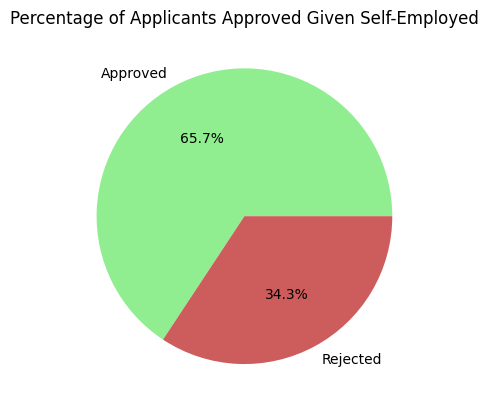

In [26]:
# 5.1 Calc and plot percentage of applications approved for self-empoloyed applicants
    # se & approved / total
    # se & approved / total se
    # se & approved / total approved

# pull relevant table or columns from mysql: application id, application status, self employed status
emp_status_df = df_from_sql_query("SELECT Application_ID, Application_Status, Self_Employed FROM cdw_sapp_loan_application;", 'creditcard_capstone', cred)
#display(emp_status_df.head())

# total appstatus=y and selfemployed=y
approved_se = len(emp_status_df[(emp_status_df['Self_Employed']=='Yes')&(emp_status_df['Application_Status']=='Y')])

#total = len(emp_status_df)
total_se = len(emp_status_df[(emp_status_df['Self_Employed']=='Yes')])
#total_approved = len(emp_status_df[(emp_status_df['Application_Status']=='Y')])

#total_approved_se_percentage = approved_se/total*100                        # se & approved / total
approved_se_percentageOfSE = approved_se/total_se*100                        # se & approved / total se
#approved_se_percentageOfApproved= approved_se/total_approved*100            # se & approved / total approved

#print(f"Total percentage of applications approved & self-employed: {total_approved_se_percentage:.2f} %") # 9%
print(f"Percentage of self-employed applicants that are approved: {approved_se_percentageOfSE:.2f} %") # 66% # percentage appstatus=y given selfemployed=y
#print(f"Percentage of approved applicants that are self-employed: {approved_se_percentageOfApproved:.2f} %") # 13% 

df_approval_bySE = emp_status_df[emp_status_df['Self_Employed']=='Yes']
#display(df_approval_bySE.head())
df_approval_bySE['Application_Status'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', labels=['Approved', 'Rejected'], colors=['#90EE90','#CD5C5C'], title="Percentage of Applicants Approved Given Self-Employed") 

# percentage of applications approved for self-empoloyed applicants
# 66% of those self-employed are approved

Self_Employed,No,Yes
Application_Status,,
N,140,24
Y,301,46


Text(0, 0.5, 'Approved Applications')

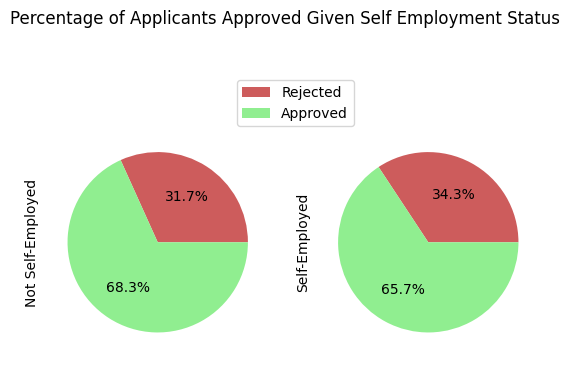

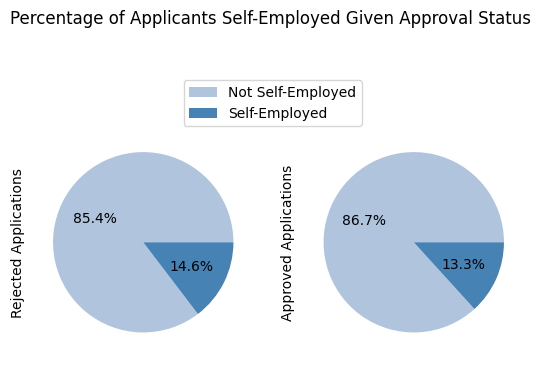

In [22]:
s = pd.crosstab(emp_status_df['Application_Status'], emp_status_df['Self_Employed'])
display(s)

axes_AS = s.plot(kind='pie', autopct='%1.1f%%', subplots=True, labels=['Rejected','Approved'], colors=['#CD5C5C','#90EE90'], title="Percentage of Applicants Approved Given Self Employment Status", labeldistance=None, legend=None)
axes_AS[0].legend(bbox_to_anchor=(1.4,1.25))
axes_AS[0].set_ylabel('Not Self-Employed')
axes_AS[1].set_ylabel('Self-Employed')

axes_ES = s.T.plot(kind='pie', autopct='%1.1f%%', subplots=True, labels=['Not Self-Employed','Self-Employed'], colors=['#B0C4DE','#4682B4'], title="Percentage of Applicants Self-Employed Given Approval Status", labeldistance=None, legend=False)
axes_ES[0].legend(bbox_to_anchor=(1.5,1.25))
axes_ES[0].set_ylabel('Rejected Applications')
axes_ES[1].set_ylabel('Approved Applications')

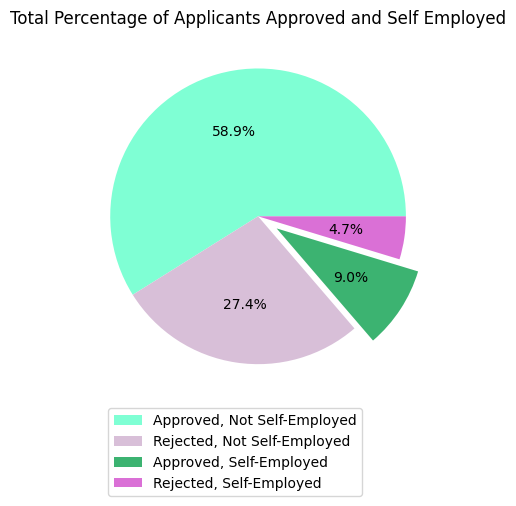

In [25]:
labels = ['Approved, Not Self-Employed', 'Rejected, Not Self-Employed', 'Approved, Self-Employed', 'Rejected, Self-Employed']
colors= ['#7FFFD4','#D8BFD8','#3CB371','#DA70D6'] 
ax_total = emp_status_df[['Application_Status', 'Self_Employed']].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0,0,0.15,0], ylabel='', labels=labels, colors=colors, title="Total Percentage of Applicants Approved and Self Employed", legend=True, labeldistance=None)
ax_total.legend(bbox_to_anchor=(.8,0))

# total 59% are approved and not self-employed
# total 27% are rejected and not self-employed
# total 9% are approved and self-employed
# total 5% are rejected and self-employed

Percentage of married male applicants that are rejected: 28.43 %


<Axes: title={'center': 'Percentage of Applicants Rejected Given Married Male'}>

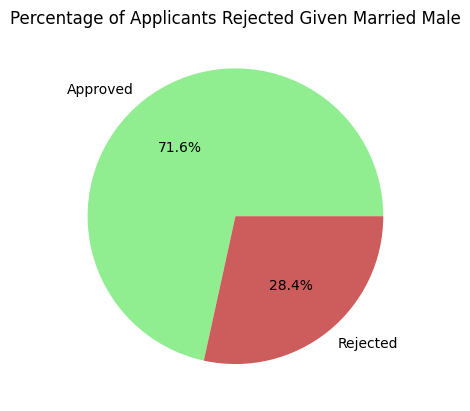

In [27]:
# 5.1 Calc and plot percentage of applications rejected for married male applicants
    # married & male & rejected / total married & male

# pull relevant table or columns from mysql: application id, application status, married status, gender
married_males_df = df_from_sql_query("SELECT Application_ID, Application_Status, Married, Gender FROM cdw_sapp_loan_application;", 'creditcard_capstone', cred)

# total appstatus=n and married=y and gender=m
rejected_mm = len(married_males_df[(married_males_df['Married']=='Yes')&(married_males_df['Gender']=='Male')&(married_males_df['Application_Status']=='N')])

# married & male & rejected / total married & male
total_mm = len(married_males_df[(married_males_df['Married']=='Yes')&(married_males_df['Gender']=='Male')])
rejected_mm_percentageOfMM = rejected_mm/total_mm*100

print(f"Percentage of married male applicants that are rejected: {rejected_mm_percentageOfMM:.2f} %")

df_rejection_byMM = married_males_df[(married_males_df['Married']=='Yes')&(married_males_df['Gender']=='Male')]
df_rejection_byMM['Application_Status'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', labels=['Approved', 'Rejected'], colors=['#90EE90','#CD5C5C'], title="Percentage of Applicants Rejected Given Married Male") 

# percentage of applications rejected for married male applicants
# 28.4% of married males are approved

MM
02    3959
10    3946
05    3946
12    3936
07    3935
Name: count, dtype: int64

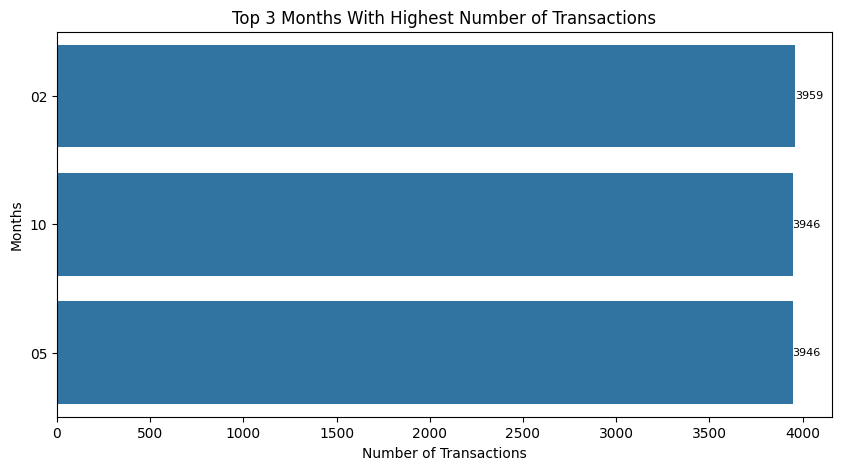

In [29]:
# 5.3 Calc and plot top 3 months with largest volume of transaction data
    # married & male & rejected / total married & male

# pull relevant table or columns from mysql: transaction id, timeid, transaction value
transaction_volume_df = df_from_sql_query("SELECT TRANSACTION_ID, TRANSACTION_VALUE, TIMEID FROM cdw_sapp_credit_card;", 'creditcard_capstone', cred)
#display(transaction_volume_df.head())

transaction_volume_df['YYYY'] = transaction_volume_df['TIMEID'].str.slice(0,4)
transaction_volume_df['MM'] = transaction_volume_df['TIMEID'].str.slice(4,6)
#display(transaction_volume_df.head())

month_transaction_counts = transaction_volume_df['MM'].value_counts().sort_values(ascending=False)
display(month_transaction_counts.head(5))

plt.figure(figsize=(10,5))
ax = sns.barplot(month_transaction_counts.head(3), orient='h')
ax.bar_label(ax.containers[0], fontsize=8)
ax.set(ylabel="Months", xlabel="Number of Transactions", title="Top 3 Months With Highest Number of Transactions")

plt.show()

MM
10    202583.89
05    201310.26
12    201251.08
07    201199.35
02    201086.67
Name: TRANSACTION_VALUE, dtype: float64

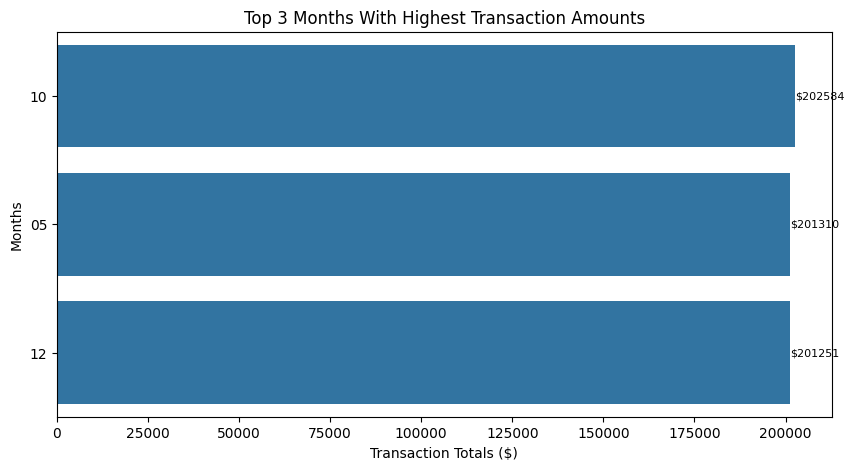

In [30]:
month_transaction_sums = transaction_volume_df.groupby('MM')['TRANSACTION_VALUE'].sum().sort_values(ascending=False)
display(month_transaction_sums.head(5))

plt.figure(figsize=(10,5))
ax = sns.barplot(month_transaction_sums.head(3), orient='h')
ax.bar_label(ax.containers[0], fontsize=8, fmt='$%.0f')
ax.set(ylabel="Months", xlabel="Transaction Totals ($)", title="Top 3 Months With Highest Transaction Amounts")

plt.show()

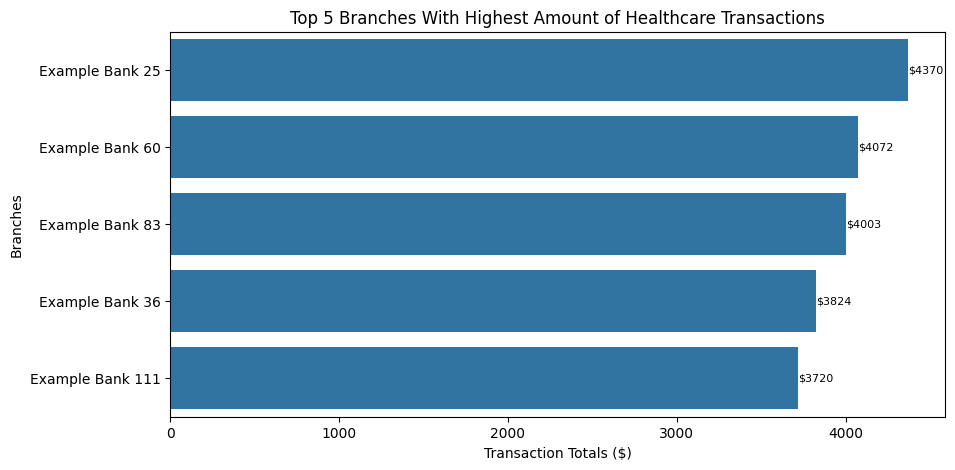

In [31]:
# 5.4 Calc and plot branch with highest amount of healthcare transactions

# pull relevant table or columns from mysql: transaction id, transaction value, transaction type, branch code
q =  """SELECT 
            cc.TRANSACTION_ID, 
            cc.TRANSACTION_VALUE,
            concat(br.BRANCH_NAME, ' ', cc.BRANCH_CODE) as BRANCH_NAME_CODE
        FROM cdw_sapp_credit_card as cc
        INNER JOIN cdw_sapp_branch as br on cc.BRANCH_CODE=br.BRANCH_CODE
        WHERE cc.TRANSACTION_TYPE='Healthcare';"""

hc_transactions_df = df_from_sql_query(q, 'creditcard_capstone', cred)
#display(hc_transactions_df.head())

branch_hc_transaction_sums = hc_transactions_df.groupby('BRANCH_NAME_CODE')['TRANSACTION_VALUE'].sum().sort_values(ascending=False)
#display(branch_hc_transaction_sums.head(5))

plt.figure(figsize=(10,5))
ax = sns.barplot(branch_hc_transaction_sums.head(5), orient='h')
ax.bar_label(ax.containers[0], fontsize=8, fmt='$%.0f')
ax.set(ylabel="Branches", xlabel="Transaction Totals ($)", title="Top 5 Branches With Highest Amount of Healthcare Transactions")

plt.show()